Import libraries

In [6]:
import numpy
import librosa
import librosa.display
import matplotlib.pyplot as plotlib

Import audio file r1.wav<p>Get an array of the file's instantaneous amplitudes<p>Get the file's sampling rate

In [4]:
file = 'r1.wav'
instAmps, sr = librosa.load(file, mono=True, sr=None)
print(instAmps, sr)

[0.0000000e+00 0.0000000e+00 3.0517578e-05 ... 1.0070801e-03 1.5563965e-03
 1.8005371e-03] 44100


Get an array of each instananeous amplitude's corresponding moment in time (in seconds)

In [22]:
nSamps = instAmps.size
sampIdxs = numpy.arange(0, nSamps)
times = sampIdxs / sr
print(nSamps, sampIdxs, times)

1048847 [      0       1       2 ... 1048844 1048845 1048846] [0.00000000e+00 2.26757370e-05 4.53514739e-05 ... 2.37833107e+01
 2.37833333e+01 2.37833560e+01]


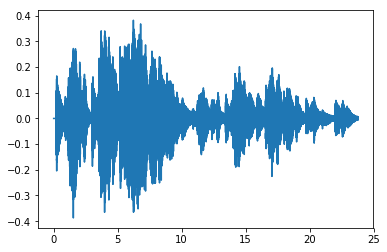

In [23]:
plotlib.plot(times, instAmps)

Add labels to the representation

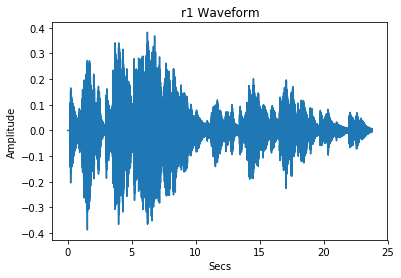

In [24]:
plotlib.title('r1 Waveform')
plotlib.xlabel('Secs')
plotlib.ylabel('Amplitude')
plotlib.plot(times, instAmps)

Plot the representation zoomed in from 15 to 25 seconds and -0.5 to 0.5 amplitude

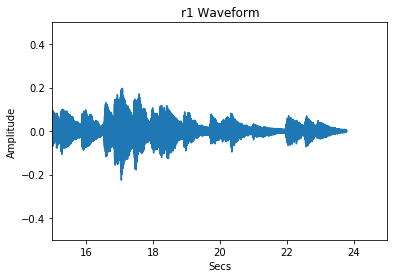

In [25]:
plotlib.title('r1 Waveform')
plotlib.xlabel('Secs')
plotlib.ylabel('Amplitude')
plotlib.xlim(15, 25)
plotlib.ylim(-0.5, 0.5)
plotlib.plot(times, instAmps)

Get r1's frequency-domain info

In [44]:
magsAndPhases = librosa.stft(instAmps)
print(magsAndPhases)

[[ 5.1193597e-04+0.0000000e+00j  4.3998333e-04+0.0000000e+00j
   3.1318946e-04+0.0000000e+00j ... -2.6455107e-01+0.0000000e+00j
  -2.2109103e-01+0.0000000e+00j -1.3010174e-01+0.0000000e+00j]
 [-3.7162058e-04-1.2197274e-19j -1.4703874e-04-7.1429655e-05j
  -2.3266659e-04-4.9895847e-05j ...  2.0218731e-01-3.1301703e-02j
   8.1519149e-02+7.8415066e-02j  7.2516955e-02+1.4571843e-02j]
 [ 2.5316759e-04+1.5807957e-19j -1.6226526e-04-3.5983827e-05j
   7.5646341e-05+1.2376902e-06j ... -1.9452812e-01+7.4123576e-02j
   9.8021895e-02+4.0540513e-02j  4.1136697e-02-1.4939938e-02j]
 ...
 [ 5.4825069e-03-2.3261847e-19j -3.5646213e-03-1.8841951e-03j
   2.6238586e-03+2.5360046e-03j ...  1.0063800e-03+2.3308194e-03j
  -1.8842035e-03+3.4226771e-04j  1.9338507e-03-6.2431013e-03j]
 [-5.4964228e-03+2.1684043e-19j  1.6781128e-03+2.9690424e-03j
  -7.7885488e-04-8.4100029e-04j ... -7.2473305e-04-1.9052178e-03j
  -1.8566960e-03-1.1602743e-05j  1.2303450e-03+3.4962902e-03j]
 [ 4.1635870e-03+0.0000000e+00j  1.31283

Get an array of just the freq magnitude info (no phase info), in dB

In [48]:
mags = numpy.abs(magsAndPhases)
magsDB = librosa.amplitude_to_db(mags, ref=numpy.max)
print(mags, magsDB)

[[5.1193597e-04 4.3998333e-04 3.1318946e-04 ... 2.6455107e-01
  2.2109103e-01 1.3010174e-01]
 [3.7162058e-04 1.6347044e-04 2.3795658e-04 ... 2.0459595e-01
  1.1311187e-01 7.3966525e-02]
 [2.5316759e-04 1.6620726e-04 7.5656470e-05 ... 2.0817178e-01
  1.0607462e-01 4.3765619e-02]
 ...
 [5.4825069e-03 4.0319618e-03 3.6491032e-03 ... 2.5388028e-03
  1.9150379e-03 6.5357550e-03]
 [5.4964228e-03 3.4104655e-03 1.1462532e-03 ... 2.0384043e-03
  1.8567322e-03 3.7064529e-03]
 [4.1635870e-03 1.3128346e-03 8.6940377e-04 ... 3.4731228e-04
  2.1083734e-03 1.2192368e-03]] [[-80.       -80.       -80.       ... -53.851387 -55.410152 -60.01591 ]
 [-80.       -80.       -80.       ... -56.083633 -61.23141  -64.92087 ]
 [-80.       -80.       -80.       ... -55.933136 -61.789345 -69.47891 ]
 ...
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]
 [-80.       -80.       -80.       ... -80.       -80.       -80. 

Plot linear spectrogram of r1

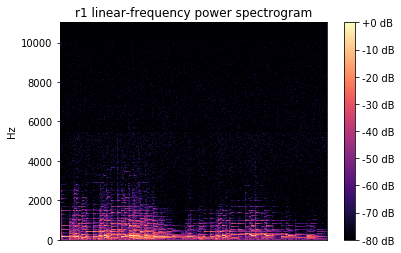

In [52]:
plotlib.title('r1 linear-frequency power spectrogram')
librosa.display.specshow(magsDB, y_axis='linear')
plotlib.colorbar(format='%+2.0f dB')